<a href="https://colab.research.google.com/github/sujalkumeriya59/Machine-Learning/blob/main/Bonus3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

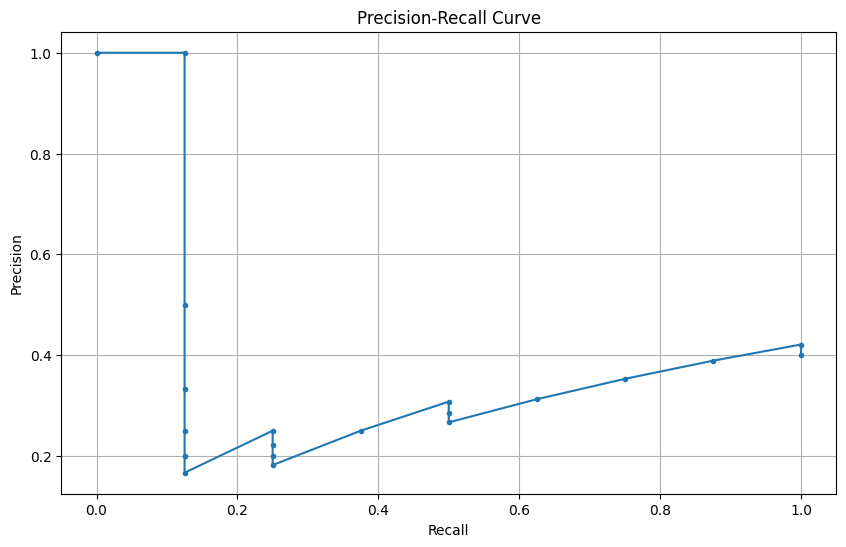

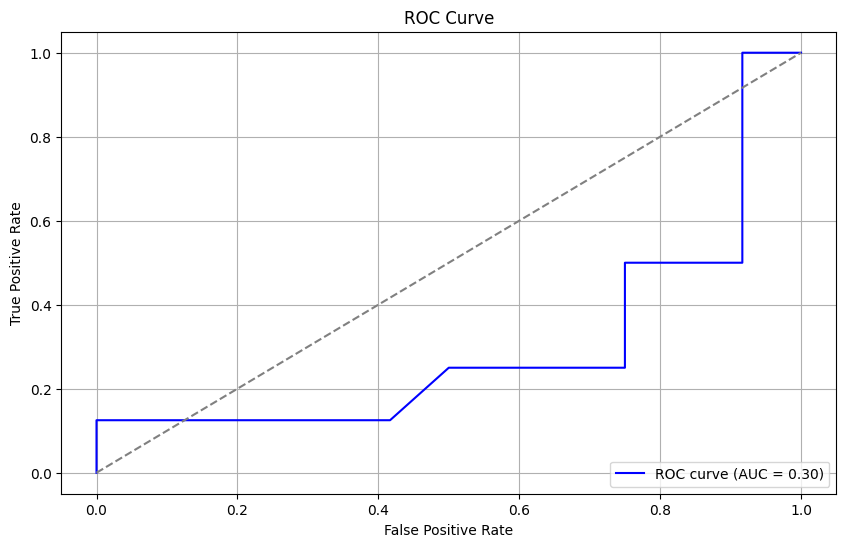

ROC-AUC: 0.2969


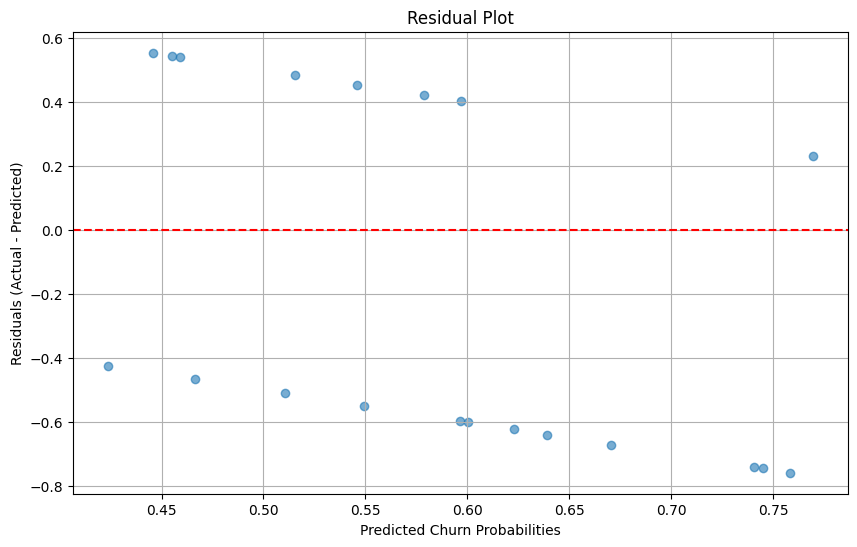

Mean Squared Error: 0.3165
R-squared: -0.3187
Accuracy (Scaled): 0.2500
Accuracy (Selected Features): 0.4000


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Load your dataset (replace with actual dataset)
# For illustration, we'll create a sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'age': np.random.randint(18, 70, size=100),
    'salary': np.random.randint(30000, 120000, size=100),
    'membership_duration': np.random.randint(1, 5, size=100),
    'churn': np.random.randint(0, 2, size=100)  # Binary target variable (0 = no churn, 1 = churn)
})

# Features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2.1: Initialize and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class (churn)

# Step 2.2: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Step 2.3: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'ROC-AUC: {roc_auc:.4f}')

# Step 3: Train a regression model (Linear Regression)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict churn probabilities
y_pred_reg = regressor.predict(X_test)

# Step 3.2: Residual Plot
residuals = y_test - y_pred_reg

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Churn Probabilities')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

# Mean Squared Error (MSE) and R^2 for regression model
mse = mean_squared_error(y_test, y_pred_reg)
r2 = regressor.score(X_test, y_test)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Step 4: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train the Random Forest model using scaled features
model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the scaled model
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Accuracy (Scaled): {accuracy_scaled:.4f}')

# Step 5: Feature Selection using SelectKBest (ANOVA F-value)
selector = SelectKBest(f_classif, k=2)  # Select top 2 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

# Predict on the selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate model performance with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy (Selected Features): {accuracy_selected:.4f}')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')